# 参数赋值

In [1]:
import numpy as np
from typing import Callable, List, Tuple
import pandas as pd

In [4]:
# Sets
N = []
P = []
D = []
N_0 = []
N_2n1 = []
C_E = []

orders = 10
for i in range(orders*2+2):
  N.append(i)
  if i <= orders:
    if i == 0:
      N_0.append(i)
    else:
      P.append(i)
  elif i < orders*2+2:
    if i == orders*2+1:
      N_2n1.append(i)
    else:
      D.append(i)

V = [1,2]
C_C = P + D
C_E = [i+1] 
N_E = N + C_E # all nodes
N_0 = N_0 + C_C
N_2n1 = N_2n1 + C_C

p_i = {}

for i in range(orders*2 + 3):
    if i in P:
        p_i[i] = 1
    elif i in D:
        p_i[i] = -1
    elif i == 0:
        p_i[i] = 0
    elif i in C_E:
        p_i[i] = 0

print(p_i)

# Parameters
Q = 6  # ve
B = 100
b = 0.5
# p_i = {0: 0, 1: 1, 2: 1, 3: -10, 4: -15, 6: 0}  # All P points have positive loads and all D points have negative
# tilde_r_i = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1}
tilde_tau_i = {1: 0, 2: 0}

# Time parameters
e_i = {i: 0 for i in N_E}
l_i = {i: 50 for i in N}

{0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: -1, 12: -1, 13: -1, 14: -1, 15: -1, 16: -1, 17: -1, 18: -1, 19: -1, 20: -1, 22: 0}


In [5]:
N_0

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

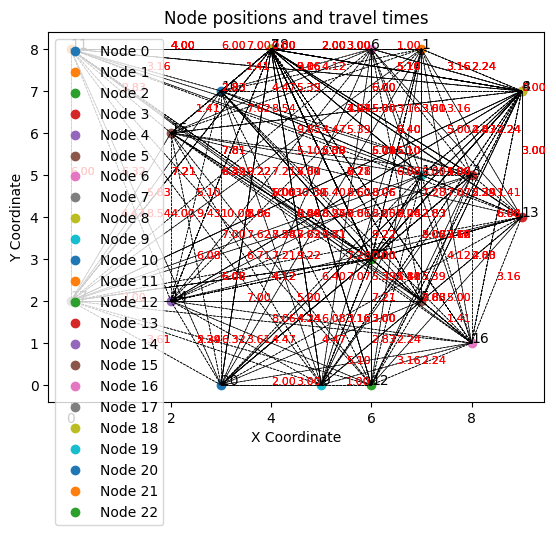

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# 定义节点坐标
min_coord = 0
max_coord = 10  # Assuming a square area from (0, 0) to (10, 10)

# Define the number of points
num_points = orders*2+3

# Initialize the dictionary
coordinates = {}

# Generate random coordinates for points
for i in range(num_points):
  if i <= orders*2:
    x = random.uniform(min_coord, max_coord)
    y = random.uniform(min_coord, max_coord)
    coordinates[i] = (int(x), int(y))
  else:
    coordinates[i] = coordinates[0]

# 计算两点间的欧几里得距离
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# 计算旅行时间，这里假设速度为单位速度1单位/时间单位
def travel_time(point1, point2):
    return euclidean_distance(point1, point2)

# 生成旅行时间矩阵
t_ij_dict = {}
for i in coordinates.keys():
    for j in coordinates.keys():
        if i != j:
            t_ij_dict[(i, j)] = travel_time(coordinates[i], coordinates[j])

# 可视化
fig, ax = plt.subplots()
for i in coordinates:
    ax.plot(coordinates[i][0], coordinates[i][1], 'o', label=f'Node {i}')
    ax.text(coordinates[i][0], coordinates[i][1], f'{i}')

for (i, j), time in t_ij_dict.items():
    ax.plot([coordinates[i][0], coordinates[j][0]], [coordinates[i][1], coordinates[j][1]], 'k--', linewidth=0.5)
    mid_point = ((coordinates[i][0] + coordinates[j][0]) / 2, (coordinates[i][1] + coordinates[j][1]) / 2)
    ax.text(mid_point[0], mid_point[1], f'{time:.2f}', color='red', fontsize=8)

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Node positions and travel times')
plt.legend()
plt.show()

In [ ]:
coordinates

{0: (6, 3),
 1: (7, 8),
 2: (4, 8),
 3: (8, 5),
 4: (9, 7),
 5: (7, 2),
 6: (6, 8),
 7: (4, 8),
 8: (9, 7),
 9: (5, 0),
 10: (3, 7),
 11: (0, 8),
 12: (6, 0),
 13: (9, 4),
 14: (2, 2),
 15: (2, 6),
 16: (8, 1),
 17: (0, 2),
 18: (4, 8),
 19: (7, 5),
 20: (3, 0),
 21: (6, 3),
 22: (6, 3)}

In [ ]:
# t_ij_dict[(8, 20)] = t_ij_dict[(8, 20)] + 0.1
# t_ij_dict[(20, 8)] = t_ij_dict[(8, 20)]

In [ ]:
# 把tij从字典转成矩阵
import numpy as np

t_ij = np.zeros((len(N_E), len(N_E)))

for i in range(len(N_E)):
  for j in range(len(N_E)):
    if i==j:
      t_ij[i][j] = 0
    else:
      t_ij[i][j] = t_ij_dict[(i, j)]

t_ij

array([[ 0.        ,  5.09901951,  5.38516481,  2.82842712,  5.        ,
         1.41421356,  5.        ,  5.38516481,  5.        ,  3.16227766,
         5.        ,  7.81024968,  3.        ,  3.16227766,  4.12310563,
         5.        ,  2.82842712,  6.08276253,  5.38516481,  2.23606798,
         4.24264069,  0.        ,  0.        ],
       [ 5.09901951,  0.        ,  3.        ,  3.16227766,  2.23606798,
         6.        ,  1.        ,  3.        ,  2.23606798,  8.24621125,
         4.12310563,  7.        ,  8.06225775,  4.47213595,  7.81024968,
         5.38516481,  7.07106781,  9.21954446,  3.        ,  3.        ,
         8.94427191,  5.09901951,  5.09901951],
       [ 5.38516481,  3.        ,  0.        ,  5.        ,  5.09901951,
         6.70820393,  2.        ,  0.        ,  5.09901951,  8.06225775,
         1.41421356,  4.        ,  8.24621125,  6.40312424,  6.32455532,
         2.82842712,  8.06225775,  7.21110255,  0.        ,  4.24264069,
         8.06225775,  5.3851

# Model

In [ ]:
from gurobipy import Model, GRB

In [ ]:
import gurobipy as gp
params = {
"WLSACCESSID": 'daa4d2b5-ee06-49b9-834b-15010a0c0cfe',
"WLSSECRET": 'e2dc2c9f-4503-4035-ae0f-28e4b3aa9668',
"LICENSEID": 2442699,
}
env = gp.Env(params=params)

# Create the model within the Gurobi environment
model = gp.Model(env=env)

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2442699
Academic license 2442699 - for non-commercial use only - registered to hy___@nyu.edu


In [ ]:
n = orders
M = 1000
B = 20

In [ ]:
# m = Model("pickup_and_delivery")
m = gp.Model(env=env)
# decision variables
x = m.addVars(N_E, N_E, V, vtype=GRB.BINARY, name="x")
y = m.addVars(N_E, V, vtype=GRB.BINARY, name="y")
r = m.addVars(D, vtype=GRB.BINARY, name="r") # late penalty decision
tau = m.addVars(N_E, V, ub=GRB.INFINITY, name="tau")
E = m.addVars(N_E, V, ub=B, name="E")
C = m.addVars(N_E, V, ub=Q, name="C")

for i in N_E:
  for j in N_E:
    for k in V:
      if (i == j) | ((i == j + orders) & (j > 0)):
        x[i, j, k].ub = 0

# objective function
# objective = sum(t_ij[i, j] * x[i, j, k] for i in N_E for j in N_E for k in V) + sum((sum(tau[i+n, k] for k in V) - e_i[i]) for i in P)
# objective = sum((sum(tau[i+n, k] for k in V) - e_i[i]) for i in P)
objective = sum(t_ij[i, j] * x[i, j, k] for i in N_E for j in N_E for k in V) + sum(r[i]*10 for i in D)
m.setObjective(objective, GRB.MINIMIZE)

In [ ]:
# 每个点被服务一次
m.addConstrs((sum(y[i, k] for k in V) == 1) for i in C_C) # Service points
m.addConstrs((y[i, k] <= 1) for i in C_E for k in V) # Charging points
m.addConstrs((sum(x[i, j, k] for j in (N+C_E) if (j != i)) == y[i, k] for i in (N_0+C_E) for k in V), "pickup_once")
m.addConstrs((sum(x[i, 2*n+1, k] for i in (N_0+C_E)) == y[2*n+1, k]) for k in V)

# m.addConstrs((x[0, 2*n+2, k] == 0) for k in V)
# m.addConstrs((sum(x[i, j, k] for i in N_0 if i != j for k in V) == 1 for j in N), "delivery_once")

# 车辆行为约束
m.addConstrs((sum(x[i, j, k] for j in N_E if j != i) - sum(x[j, i, k] for j in N_E if j != i) == 0) for i in (C_C+C_E) for k in V)
m.addConstrs((sum(x[0, j, k] for j in (N_2n1+C_E)) - sum(x[j, 0, k] for j in (N_2n1+C_E)) == 1) for k in V)
# m.addConstrs((sum(x[i, 2*n+1, k] for i in (N_0+C_E)) - sum(x[2*n+1, i, k] for j in (N_0+C_E)) == 1) for k in V)


# 时间窗口约束
m.addConstrs(tau[0, k] == 0 for k in V)
m.addConstrs((tau[i, k] + 2 + t_ij[i, j] * x[i, j, k] - M * (1 - x[i, j, k]) <= tau[j, k] for i in (N_0 + C_E) for j in (N_2n1 + C_E) if (j != i) for k in V), "time_window_1")
# m.addConstrs((tau[i, k] + t_ij[i, i+n] * x[i, i+n, k] <= tau[i+n, k] for i in P for k in V), "pickup_before_delivery")
m.addConstrs((tau[i, k] + t_ij[i, i+n] - M * (1 - y[i, k]) <= tau[i+n, k] for i in P for k in V), "pickup_before_delivery")
m.addConstrs((tau[i, k] >= e_i[i]*y[i, k] for i in P for k in V), "earliest_start_time")
m.addConstrs((l_i[i] - tau[i, k] <= M * (1 - r[i]) for i in D for k in V), "no late no penalty")
m.addConstrs((tau[i, k] - l_i[i] <= M * r[i] for i in D for k in V), "no late no penalty")

# # 电池约束
m.addConstrs((E[0, k] == B for k in V), "initial_battery")
m.addConstrs((E[j, k] <= E[i, k] - b * t_ij[i, j] * x[i, j, k] + B*(1-x[i, j, k]) for i in (N_0) for j in (N_2n1 + C_E) if (j != i) for k in V), "battery_usage")
m.addConstrs((E[j, k] >= E[i, k] - b * t_ij[i, j] * x[i, j, k] - B*(1-x[i, j, k]) for i in (N_0) for j in (C_C + C_E) if (j != i) for k in V), "battery_usage")
m.addConstrs((E[j, k] <= B - b * t_ij[i, j] * x[i, j, k] + M * (1-x[i, j, k]) for i in C_E for j in N_2n1 if (j != i) for k in V))
m.addConstrs((E[j, k] >= B - b * t_ij[i, j] * x[i, j, k] - M * (1-x[i, j, k]) for i in C_E for j in N_2n1 if (j != i) for k in V))

# # 载重约束
m.addConstrs((C[i, k] + p_i[i] * x[i, j, k] - Q * (1 - x[i, j, k])<= C[j, k] for i in (N_0 + C_E) for j in (N_2n1 + C_E) if (j != i) for k in V), "capacity_transfer")
m.addConstrs(C[0, k] == 0 for k in V)
m.addConstrs(C[2*n+1, k] == 0 for k in V)

# 确保决策变量的定义域
m.addConstrs((x[i, j, k] >= 0 for i in N_E for j in N_E for k in V), "domain_x")
m.addConstrs((tau[i, k] >= 0 for i in N_E for k in V), "domain_tau")
m.addConstrs(y[i, k] == y[i+n, k] for i in P for k in V)
m.addConstrs(E[i, k] >= 0 for i in N_E for k in V)

{(0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (2, 1): <gurobi.Constr *Awaiting Model Update*>,
 (2, 2): <gurobi.Constr *Awaiting Model Update*>,
 (3, 1): <gurobi.Constr *Awaiting Model Update*>,
 (3, 2): <gurobi.Constr *Awaiting Model Update*>,
 (4, 1): <gurobi.Constr *Awaiting Model Update*>,
 (4, 2): <gurobi.Constr *Awaiting Model Update*>,
 (5, 1): <gurobi.Constr *Awaiting Model Update*>,
 (5, 2): <gurobi.Constr *Awaiting Model Update*>,
 (6, 1): <gurobi.Constr *Awaiting Model Update*>,
 (6, 2): <gurobi.Constr *Awaiting Model Update*>,
 (7, 1): <gurobi.Constr *Awaiting Model Update*>,
 (7, 2): <gurobi.Constr *Awaiting Model Update*>,
 (8, 1): <gurobi.Constr *Awaiting Model Update*>,
 (8, 2): <gurobi.Constr *Awaiting Model Update*>,
 (9, 1): <gurobi.Constr *Awaiting Model Update*>,
 (9, 2): <gurobi.Constr *Awaiting Model Update*>,


In [ ]:
# m.setParam('NoRelHeurWork', 150)
m.setParam('TimeLimit', 500)
# m.setParam('MIPFocus', 3)
# m.setParam('Cuts', 3)
m.optimize()
# m.discardConcurrentEnvs()

Set parameter TimeLimit to value 500
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license 2442699 - for non-commercial use only - registered to hy___@nyu.edu
Optimize a model with 5032 rows, 1252 columns and 15296 nonzeros
Model fingerprint: 0x083eeafc
Variable types: 138 continuous, 1114 integer (1114 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [1e+00, 1e+01]
  Bounds range     [1e+00, 2e+01]
  RHS range        [1e+00, 1e+03]
Presolve removed 1500 rows and 182 columns
Presolve time: 0.16s
Presolved: 3532 rows, 1070 columns, 24234 nonzeros
Variable types: 126 continuous, 944 integer (944 binary)

Root relaxation: objective 2.672525e+01, 136 iterations, 0.02 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |    

In [ ]:
for k in V:
  for i in N_E:
    for j in N_E:
      if (x[i, j, k].X > 0.5): #& (b * t_ij[i, j] * x[i, j, k].X >0):
        print(f"Vehicle {k} from {i} to {j} battery consume", b * t_ij[i, j] * x[i, j, k].X )

Vehicle 1 from 0 to 2 battery consume 2.692582403567252
Vehicle 1 from 2 to 10 battery consume 0.7071067811865476
Vehicle 1 from 3 to 13 battery consume 0.7071067811865476
Vehicle 1 from 9 to 12 battery consume 0.5
Vehicle 1 from 10 to 20 battery consume 3.5
Vehicle 1 from 12 to 19 battery consume 2.5495097567963922
Vehicle 1 from 13 to 22 battery consume 1.5811388300841898
Vehicle 1 from 19 to 3 battery consume 0.5
Vehicle 1 from 20 to 9 battery consume 1.0
Vehicle 1 from 22 to 21 battery consume 0.0
Vehicle 2 from 0 to 5 battery consume 0.7071067811865476
Vehicle 2 from 1 to 6 battery consume 0.5
Vehicle 2 from 4 to 8 battery consume 0.0
Vehicle 2 from 5 to 4 battery consume 2.692582403567252
Vehicle 2 from 6 to 7 battery consume 1.0
Vehicle 2 from 7 to 18 battery consume 0.0
Vehicle 2 from 8 to 1 battery consume 1.118033988749895
Vehicle 2 from 11 to 15 battery consume 1.4142135623730951
Vehicle 2 from 14 to 16 battery consume 3.0413812651491097
Vehicle 2 from 15 to 17 battery consu

In [ ]:
if m.status == GRB.OPTIMAL:
    print("Optimal solution found:")
    for k in V:
      for i in N_E:
        for j in N_E:
          if (x[i, j, k].X > 0.5):
            print(f"Vehicle {k} travels from {i} to {j}")
else:
    print("Optimal solution not found.")
    for k in V:
      for i in N_E:
        for j in N_E:
          if (x[i, j, k].X > 0.5) & (k == 1):
            print(f"Vehicle {k} travels from {i} to {j}")

Optimal solution not found.
Vehicle 1 travels from 0 to 2
Vehicle 1 travels from 2 to 10
Vehicle 1 travels from 3 to 13
Vehicle 1 travels from 9 to 12
Vehicle 1 travels from 10 to 20
Vehicle 1 travels from 12 to 19
Vehicle 1 travels from 13 to 22
Vehicle 1 travels from 19 to 3
Vehicle 1 travels from 20 to 9
Vehicle 1 travels from 22 to 21


In [ ]:
for k in V:
  for i in N_E:
    if (y[i, k].X > 0) & (k == 1):
      print(f'Energy level at {i} for vehilce {k}',E[i,k].X)

Energy level at 0 for vehilce 1 20.0
Energy level at 2 for vehilce 1 17.30741759643275
Energy level at 3 for vehilce 1 8.550801058449835
Energy level at 9 for vehilce 1 12.100310815246228
Energy level at 10 for vehilce 1 16.600310815246203
Energy level at 12 for vehilce 1 11.600310815246228
Energy level at 13 for vehilce 1 7.843694277263289
Energy level at 19 for vehilce 1 9.050801058449835
Energy level at 20 for vehilce 1 13.100310815246203
Energy level at 21 for vehilce 1 20.0
Energy level at 22 for vehilce 1 6.2625554471791


In [ ]:
for i in D:
  print(r[i].x)

0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0


In [ ]:
for k in V:
  for i in N_E:
    if (y[i,k].X>0) & (k == 1):
      print(f'Time at {i} for Vehicle {k}:',tau[i,k].X)

Time at 0 for Vehicle 1: 0.0
Time at 2 for Vehicle 1: 7.385164807134515
Time at 3 for Vehicle 1: 36.89839788310043
Time at 9 for Vehicle 1: 23.79937836950762
Time at 10 for Vehicle 1: 10.799378369507622
Time at 12 for Vehicle 1: 26.799378369507632
Time at 13 for Vehicle 1: 40.312611445473536
Time at 19 for Vehicle 1: 33.89839788310043
Time at 20 for Vehicle 1: 19.79937836950762
Time at 21 for Vehicle 1: 48.0
Time at 22 for Vehicle 1: 45.474889105641864


In [ ]:
for k in V:
  for i in N_E:
    if y[i, k].X > 0:
      print(f'Load at {i} for vehicle {k}', C[i,k].X)

Load at 0 for vehicle 1 0.0
Load at 1 for vehicle 1 0.0
Load at 6 for vehicle 1 1.0
Load at 11 for vehicle 1 0.0
Load at 12 for vehicle 1 1.0
Load at 0 for vehicle 2 0.0
Load at 2 for vehicle 2 0.0
Load at 3 for vehicle 2 0.0
Load at 4 for vehicle 2 1.0
Load at 5 for vehicle 2 1.0
Load at 7 for vehicle 2 2.0
Load at 8 for vehicle 2 1.0
Load at 9 for vehicle 2 2.0
Load at 10 for vehicle 2 1.0
Load at 11 for vehicle 2 0.0
Load at 12 for vehicle 2 2.0


In [ ]:
tau[6, 1].X + t_ij[6, 5] * x[6, 5, 1].X - M * (1 - x[6, 5, 1].X)

22.020939245499335

In [ ]:
tau[5, 1].X

23.0

# one for all

## 参数

In [ ]:
import numpy as np
from typing import Callable, List, Tuple
import pandas as pd
import matplotlib.pyplot as plt
import random


# Sets
N = []
P = []
D = []
N_0 = []
N_2n1 = []
C_E = []

orders = 10
for i in range(orders*2+2):
  N.append(i)
  if i <= orders:
    if i == 0:
      N_0.append(i)
    else:
      P.append(i)
  elif i < orders*2+2:
    if i == orders*2+1:
      N_2n1.append(i)
    else:
      D.append(i)

V = [1,2]
C_C = P + D
C_E = [i+1]
N_E = N + C_E
N_0 = N_0 + C_C
N_2n1 = N_2n1 + C_C

p_i = {}

for i in range(orders*2 + 3):
    if i in P:
        p_i[i] = 1
    elif i in D:
        p_i[i] = -1
    elif i == 0:
        p_i[i] = 0
    elif i in C_E:
        p_i[i] = 0

print(p_i)

# Parameters
Q = 6  # ve
B = 100
b = 0.5
# p_i = {0: 0, 1: 1, 2: 1, 3: -10, 4: -15, 6: 0}  # All P points have positive loads and all D points have negative
# tilde_r_i = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1}
tilde_tau_i = {1: 0, 2: 0}

# Time parameters
e_i = {i: 0 for i in N_E}
l_i = {i: 50 for i in N}


# 定义节点坐标
min_coord = 0
max_coord = 10  # Assuming a square area from (0, 0) to (10, 10)

# Define the number of points
num_points = orders*2+3

# Initialize the dictionary
coordinates = {}

# Generate random coordinates for points
for i in range(num_points):
  if i <= orders*2:
    x = random.uniform(min_coord, max_coord)
    y = random.uniform(min_coord, max_coord)
    coordinates[i] = (int(x), int(y))
  else:
    coordinates[i] = coordinates[0]

# 计算两点间的欧几里得距离
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# 计算旅行时间，这里假设速度为单位速度1单位/时间单位
def travel_time(point1, point2):
    return euclidean_distance(point1, point2)

# 生成旅行时间矩阵
t_ij_dict = {}
for i in coordinates.keys():
    for j in coordinates.keys():
        if i != j:
            t_ij_dict[(i, j)] = travel_time(coordinates[i], coordinates[j])


# 把tij从字典转成矩阵
import numpy as np

t_ij = np.zeros((len(N_E), len(N_E)))

for i in range(len(N_E)):
  for j in range(len(N_E)):
    if i==j:
      t_ij[i][j] = 0
    else:
      t_ij[i][j] = t_ij_dict[(i, j)]


n = orders
M = 1000
B = 20

## 模型

In [ ]:
from gurobipy import Model, GRB
# params是私人信息不方便透露
env = gp.Env(params=params)

# Create the model within the Gurobi environment
model = gp.Model(env=env)

# m = Model("pickup_and_delivery")
m = gp.Model(env=env)
# decision variables
x = m.addVars(N_E, N_E, V, vtype=GRB.BINARY, name="x")
y = m.addVars(N_E, V, vtype=GRB.BINARY, name="y")
r = m.addVars(D, vtype=GRB.BINARY, name="r") # late penalty decision
tau = m.addVars(N_E, V, ub=GRB.INFINITY, name="tau")
E = m.addVars(N_E, V, ub=B, name="E")
C = m.addVars(N_E, V, ub=Q, name="C")

for i in N_E:
  for j in N_E:
    for k in V:
      if (i == j) | ((i == j + orders) & (j > 0)):
        x[i, j, k].ub = 0

# objective function
# objective = sum(t_ij[i, j] * x[i, j, k] for i in N_E for j in N_E for k in V) + sum((sum(tau[i+n, k] for k in V) - e_i[i]) for i in P)
# objective = sum((sum(tau[i+n, k] for k in V) - e_i[i]) for i in P)
objective = sum(t_ij[i, j] * x[i, j, k] for i in N_E for j in N_E for k in V) + sum(r[i]*10 for i in D)
m.setObjective(objective, GRB.MINIMIZE)

# 每个点被服务一次
m.addConstrs((sum(y[i, k] for k in V) == 1) for i in C_C) # Service points
m.addConstrs((y[i, k] <= 1) for i in C_E for k in V) # Charging points
m.addConstrs((sum(x[i, j, k] for j in (N+C_E) if (j != i)) == y[i, k] for i in (N_0+C_E) for k in V), "pickup_once")
m.addConstrs((sum(x[i, 2*n+1, k] for i in (N_0+C_E)) == y[2*n+1, k]) for k in V)

# m.addConstrs((x[0, 2*n+2, k] == 0) for k in V)
# m.addConstrs((sum(x[i, j, k] for i in N_0 if i != j for k in V) == 1 for j in N), "delivery_once")

# 车辆行为约束
m.addConstrs((sum(x[i, j, k] for j in N_E if j != i) - sum(x[j, i, k] for j in N_E if j != i) == 0) for i in (C_C+C_E) for k in V)
m.addConstrs((sum(x[0, j, k] for j in (N_2n1+C_E)) - sum(x[j, 0, k] for j in (N_2n1+C_E)) == 1) for k in V)
# m.addConstrs((sum(x[i, 2*n+1, k] for i in (N_0+C_E)) - sum(x[2*n+1, i, k] for j in (N_0+C_E)) == 1) for k in V)


# 时间窗口约束
m.addConstrs(tau[0, k] == 0 for k in V)
m.addConstrs((tau[i, k] + 2 + t_ij[i, j] * x[i, j, k] - M * (1 - x[i, j, k]) <= tau[j, k] for i in (N_0 + C_E) for j in (N_2n1 + C_E) if (j != i) for k in V), "time_window_1")
# m.addConstrs((tau[i, k] + t_ij[i, i+n] * x[i, i+n, k] <= tau[i+n, k] for i in P for k in V), "pickup_before_delivery")
m.addConstrs((tau[i, k] + t_ij[i, i+n] - M * (1 - y[i, k]) <= tau[i+n, k] for i in P for k in V), "pickup_before_delivery")
m.addConstrs((tau[i, k] >= e_i[i]*y[i, k] for i in P for k in V), "earliest_start_time")
m.addConstrs((l_i[i] - tau[i, k] <= M * (1 - r[i]) for i in D for k in V), "no late no penalty")
m.addConstrs((tau[i, k] - l_i[i] <= M * r[i] for i in D for k in V), "no late no penalty")

# # 电池约束
m.addConstrs((E[0, k] == B for k in V), "initial_battery")
m.addConstrs((E[j, k] <= E[i, k] - b * t_ij[i, j] * x[i, j, k] + B*(1-x[i, j, k]) for i in (N_0) for j in (N_2n1 + C_E) if (j != i) for k in V), "battery_usage")
m.addConstrs((E[j, k] >= E[i, k] - b * t_ij[i, j] * x[i, j, k] - B*(1-x[i, j, k]) for i in (N_0) for j in (C_C + C_E) if (j != i) for k in V), "battery_usage")
m.addConstrs((E[j, k] <= B - b * t_ij[i, j] * x[i, j, k] + M * (1-x[i, j, k]) for i in C_E for j in N_2n1 if (j != i) for k in V))
m.addConstrs((E[j, k] >= B - b * t_ij[i, j] * x[i, j, k] - M * (1-x[i, j, k]) for i in C_E for j in N_2n1 if (j != i) for k in V))

# # 载重约束
m.addConstrs((C[i, k] + p_i[i] * x[i, j, k] - Q * (1 - x[i, j, k])<= C[j, k] for i in (N_0 + C_E) for j in (N_2n1 + C_E) if (j != i) for k in V), "capacity_transfer")
m.addConstrs(C[0, k] == 0 for k in V)
m.addConstrs(C[2*n+1, k] == 0 for k in V)

# 确保决策变量的定义域
m.addConstrs((x[i, j, k] >= 0 for i in N_E for j in N_E for k in V), "domain_x")
m.addConstrs((tau[i, k] >= 0 for i in N_E for k in V), "domain_tau")
m.addConstrs(y[i, k] == y[i+n, k] for i in P for k in V)
m.addConstrs(E[i, k] >= 0 for i in N_E for k in V)


## 求解

In [ ]:
# m.setParam('NoRelHeurWork', 150)
m.setParam('TimeLimit', 500)
# m.setParam('MIPFocus', 3)
# m.setParam('Cuts', 3)
m.optimize()
# m.discardConcurrentEnvs()

for k in V:
  for i in N_E:
    for j in N_E:
      if (x[i, j, k].X > 0.5): #& (b * t_ij[i, j] * x[i, j, k].X >0):
        print(f"Vehicle {k} from {i} to {j} battery consume", b * t_ij[i, j] * x[i, j, k].X )


if m.status == GRB.OPTIMAL:
    print("Optimal solution found:")
    for k in V:
      for i in N_E:
        for j in N_E:
          if (x[i, j, k].X > 0.5):
            print(f"Vehicle {k} travels from {i} to {j}")
else:
    print("Optimal solution not found.")
    for k in V:
      for i in N_E:
        for j in N_E:
          if (x[i, j, k].X > 0.5) & (k == 1):
            print(f"Vehicle {k} travels from {i} to {j}")

